In [1]:
import pandas as pd #type: ignore
from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor#type: ignore
import seaborn as sn#type: ignore
import matplotlib.pyplot as plt#type: ignore
from sklearn.impute import SimpleImputer#type: ignore
from sklearn.preprocessing import StandardScaler#type: ignore
from sklearn.model_selection import train_test_split#type: ignore
from imblearn.over_sampling import SMOTE#type: ignore
from sklearn.metrics import accuracy_score#type: ignore
from sklearn.pipeline import Pipeline#type: ignore
from sklearn.compose import ColumnTransformer#type: ignore
from sklearn.preprocessing import FunctionTransformer #type: ignore

Tiền và các khoản tương đương tiền    9.099321e+08
Đầu tư tài chính                      1.740270e+09
Các khoản phải thu                    4.319732e+08
Hàng tồn kho                          3.807047e+08
Tài sản cố định                       2.431865e+09
Bất động sản đầu tư                   1.768839e+09
XDCB dở dang                          1.457066e+09
Tài sản khác                          4.486930e+07
Nợ phải trả                           4.109762e+09
Vốn chủ sở hữu                        1.143348e+09
Doanh thu kế hoạch năm kế hoạch       3.285166e+08
Lợi nhuận kế hoạch năm kế hoạch       1.850283e+09
Tổng nhu cầu vốn                      6.359488e+09
Nguồn vốn cần vay                     3.226114e+09
Thời gian sử dụng hạn mức (năm)       2.000000e+00
Phần trăm chấp nhận cho vay           0.000000e+00
Name: 0, dtype: float64


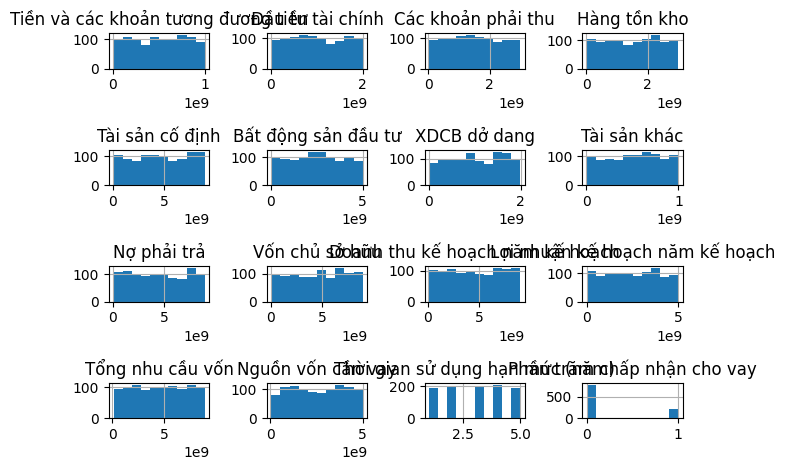

<Axes: >

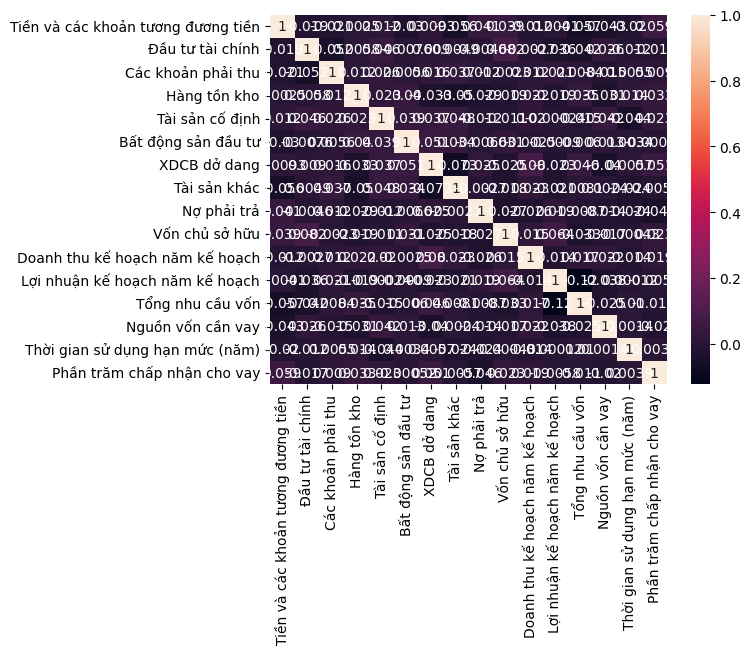

In [2]:
data = pd.read_csv('financial_loan_acceptance_smes_scaled.csv')
print(data.iloc[0])
data.hist()
plt.tight_layout()
plt.show()
sn.heatmap(data.corr(), annot = True)

In [3]:
missing_count = data.isnull().sum()
if missing_count.sum() > 0:
    imputer = SimpleImputer(strategy="mean")  # Điền bằng trung bình
    data.iloc[:, :] = imputer.fit_transform(data)

In [4]:
data['Khả năng thanh toán lãi vay'] = data['Lợi nhuận kế hoạch năm kế hoạch'] / data['Nợ phải trả']
Tong_Tai_San = data['Tiền và các khoản tương đương tiền'] + data['Đầu tư tài chính'] + data['Các khoản phải thu'] + data['Hàng tồn kho'] + data['XDCB dở dang'] + data['Bất động sản đầu tư'] + data['Tài sản cố định'] + data['Tài sản khác'] 
data['Hiệu suất sử dụng tài sản '] = data['Các khoản phải thu'] / Tong_Tai_San
data['Hiệu suất sử dụng tài sản cố định'] = data['Các khoản phải thu'] / data['Tài sản cố định']
data['Tỷ suất tự tài trợ'] = data['Vốn chủ sở hữu'] / data['Tổng nhu cầu vốn']

In [5]:
x=data.drop("Phần trăm chấp nhận cho vay", axis=1)
y=data["Phần trăm chấp nhận cho vay"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

print(y_train.value_counts())
ros = SMOTE(random_state=42, k_neighbors=3, sampling_strategy={0: 800, 1: 500,})
x_train, y_train = ros.fit_resample(x_train, y_train)
print(y_train.value_counts())

Phần trăm chấp nhận cho vay
0    628
1    172
Name: count, dtype: int64
Phần trăm chấp nhận cho vay
0    800
1    500
Name: count, dtype: int64


In [6]:
numeric_features = x_train.columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
    ]
)

tabnet = Pipeline([  
    ("preprocessor", preprocessor), 
    ("model", TabNetClassifier())             
])

c:\Users\Administrator\AppData\Local\Programs\Python\Python38\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


In [7]:
tabnet = Pipeline([  
    ("preprocessor", preprocessor), 
    ("model", TabNetClassifier())             
])
tabnet.fit( x_train, y_train )

c:\Users\Administrator\AppData\Local\Programs\Python\Python38\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.97187 |  0:00:00s
epoch 1  | loss: 0.88183 |  0:00:00s
epoch 2  | loss: 0.76634 |  0:00:00s
epoch 3  | loss: 0.73301 |  0:00:00s
epoch 4  | loss: 0.72788 |  0:00:00s
epoch 5  | loss: 0.68555 |  0:00:00s
epoch 6  | loss: 0.67009 |  0:00:00s
epoch 7  | loss: 0.65228 |  0:00:00s
epoch 8  | loss: 0.6476  |  0:00:00s
epoch 9  | loss: 0.65383 |  0:00:00s
epoch 10 | loss: 0.64841 |  0:00:00s
epoch 11 | loss: 0.63659 |  0:00:01s
epoch 12 | loss: 0.63886 |  0:00:01s
epoch 13 | loss: 0.64242 |  0:00:01s
epoch 14 | loss: 0.6347  |  0:00:01s
epoch 15 | loss: 0.64114 |  0:00:01s
epoch 16 | loss: 0.63543 |  0:00:01s
epoch 17 | loss: 0.62129 |  0:00:01s
epoch 18 | loss: 0.62545 |  0:00:01s
epoch 19 | loss: 0.63111 |  0:00:01s
epoch 20 | loss: 0.63336 |  0:00:01s
epoch 21 | loss: 0.61816 |  0:00:01s
epoch 22 | loss: 0.61078 |  0:00:01s
epoch 23 | loss: 0.6112  |  0:00:01s
epoch 24 | loss: 0.59182 |  0:00:01s
epoch 25 | loss: 0.5937  |  0:00:01s
epoch 26 | loss: 0.6086  |  0:00:02s
e

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Tiền và các khoản tương '
                                                   'đương tiền',
                                                   'Đầu tư tài chính',
                                                   'Các khoản phải thu',
                                                   'Hàng tồn kho',
                                                   'Tài sản cố định',
                                                   'Bất động sản đầu tư',
                                                   'XDCB dở dang',
                                                   'Tài sản khác',
                                                   'Nợ phải trả',
                                                   'Vốn chủ sở hữu',
                                                   'Doanh thu kế hoạch năm kế '
                                                   'hoạch',
                                                   'Lợi nhuận kế hoạch năm kế '
                                                   'hoạch',
                                                   'Tổng nhu cầu vốn',
                                                   'Nguồn vốn cần vay',
                                                   'Thời gian sử dụng hạn mức '
                                                   '(năm)',
                                                   'Khả năng thanh toán lãi '
                                                   'vay',
                                                   'Hiệu suất sử dụng tài sản ',
                                                   'Hiệu suất sử dụng tài sản '
                                                   'cố định',
                                                   'Tỷ suất tự tài trợ'])])),
                ('model',
                 TabNetClassifier(cat_dims=[], cat_emb_dim=[], cat_idxs=[], grouped_features=[], input_dim=19, optimizer_params={'lr': 0.02}, output_dim=2, scheduler_params={}))])

In [8]:
y_pred = tabnet.predict(x_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')

Accuracy: 0.6400


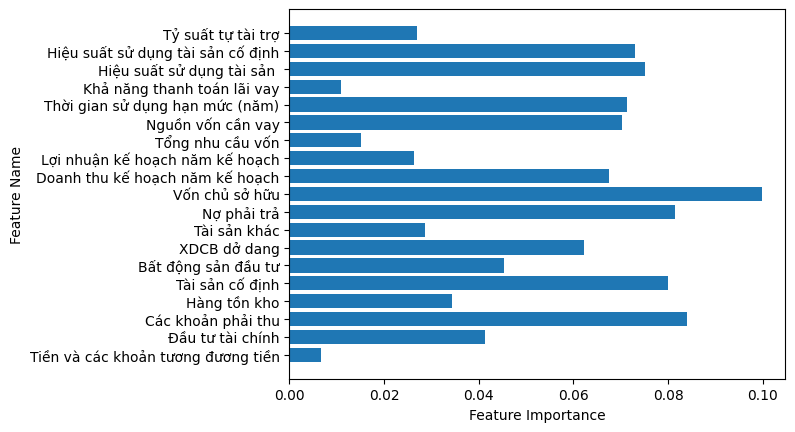

In [9]:
import matplotlib.pyplot as plt#type: ignore

feature_importances = tabnet.named_steps["model"].feature_importances_
plt.barh(x.columns, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.show()


In [10]:
features = x_train.columns.tolist()
print(features)
#new_data = pd.DataFrame([[0.5, 1.2, 3.4, 5.6, 2.1, 0.9, 4.3, 3.8, 1.5, 2.7]], 
#                        columns=features)

['Tiền và các khoản tương đương tiền', 'Đầu tư tài chính', 'Các khoản phải thu', 'Hàng tồn kho', 'Tài sản cố định', 'Bất động sản đầu tư', 'XDCB dở dang', 'Tài sản khác', 'Nợ phải trả', 'Vốn chủ sở hữu', 'Doanh thu kế hoạch năm kế hoạch', 'Lợi nhuận kế hoạch năm kế hoạch', 'Tổng nhu cầu vốn', 'Nguồn vốn cần vay', 'Thời gian sử dụng hạn mức (năm)', 'Khả năng thanh toán lãi vay', 'Hiệu suất sử dụng tài sản ', 'Hiệu suất sử dụng tài sản cố định', 'Tỷ suất tự tài trợ']


In [12]:
import joblib
joblib.dump(tabnet, "tabnet_pipeline.pkl")

['tabnet_pipeline.pkl']

In [21]:
cl = x_train.columns.to_list()
print(cl)

['Tiền và các khoản tương đương tiền', 'Đầu tư tài chính', 'Các khoản phải thu', 'Hàng tồn kho', 'Tài sản cố định', 'Bất động sản đầu tư', 'XDCB dở dang', 'Tài sản khác', 'Nợ phải trả', 'Vốn chủ sở hữu', 'Doanh thu kế hoạch năm kế hoạch', 'Lợi nhuận kế hoạch năm kế hoạch', 'Tổng nhu cầu vốn', 'Nguồn vốn cần vay', 'Thời gian sử dụng hạn mức (năm)', 'Khả năng thanh toán lãi vay', 'Hiệu suất sử dụng tài sản ', 'Hiệu suất sử dụng tài sản cố định', 'Tỷ suất tự tài trợ']


In [55]:
temp = x_test.iloc[[0]]
temp = tabnet.named_steps["preprocessor"].transform(temp)
model = tabnet.named_steps["model"]
print(model.explain(temp))

(array([[0.        , 0.        , 1.05157948, 0.        , 0.01901598,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        2.08149838, 0.        , 0.        , 4.21282005, 0.61566138,
        0.        , 2.04320145, 0.        , 0.        ]]), {0: array([[0.        , 0.        , 0.28254735, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.1684677 , 0.        ,
        0.        , 0.54898483, 0.        , 0.        ]]), 1: array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.77173716, 0.        , 0.        , 0.        , 0.22826284,
        0.        , 0.        , 0.        , 0.        ]]), 2: array([[0.        , 0.        , 0.        , 0.        , 0.00527513,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.99472487, 0.      

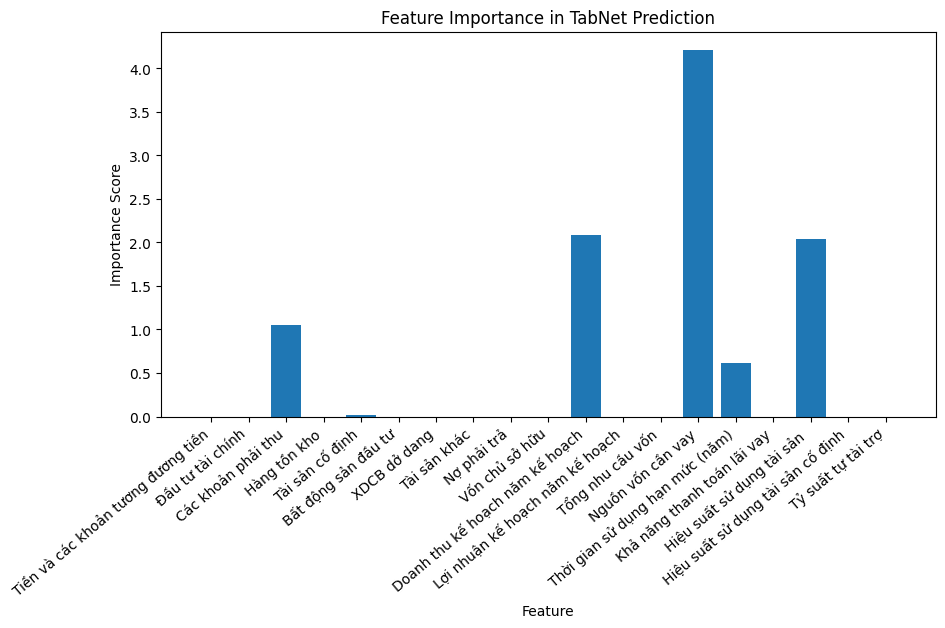

In [63]:
import matplotlib.pyplot as plt
import numpy as np

masks = model.explain(temp)

# Lấy mask cuối cùng (độ quan trọng của feature trong quyết định cuối)
feature_importance = np.mean(masks[0], axis=0)  # Trung bình theo từng feature

# Vẽ biểu đồ
plt.figure(figsize=(10, 5))
plt.bar(x_test.columns.tolist(), feature_importance)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature Importance in TabNet Prediction")
#plt.xticks(rotation=90)  
plt.xticks(rotation=40, ha='right')
plt.show()
